Go to the end of the notebook to see the predictions

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/all_image_features.pkl','rb') as f:
  d=pickle.load(f) # image features of all the images obtained by passing through InceptionV3

In [ ]:
with open('/content/drive/MyDrive/Flickr8k_text/Flickr_8k.testImages.txt') as f:
  l=f.readlines() # test images

In [ ]:
with open('/content/drive/MyDrive/Flickr8k_text/Flickr8k.token.txt') as f:
  l1=f.readlines() # Ground truth answers

In [ ]:
l[0] # we have the image name

'3385593926_d3e9c21170.jpg\n'

In [ ]:
l1[0] # we have the caption of an image, along with the image name

'1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .\n'

In [ ]:
word_dict={}

In [ ]:
# each image name has multiple captions, so we are grouping together

for i in range(len(l1)):
  p=l1[i].split('\t')
  if(not((p[0][:-2]) in word_dict)):
    word_dict[p[0][:-2]]=[]
    word_dict[p[0][:-2]].append('<start> '+p[1][:-1].lower()+' <end>')
  else:
    word_dict[p[0][:-2]].append('<start> '+p[1][:-1].lower()+' <end>')

In [ ]:
word_dict['1000268201_693b08cb0e.jpg'] # so we have all captioning the value, with image name as key

['<start> a child in a pink dress is climbing up a set of stairs in an entry way . <end>',
 '<start> a girl going into a wooden building . <end>',
 '<start> a little girl climbing into a wooden playhouse . <end>',
 '<start> a little girl climbing the stairs to her playhouse . <end>',
 '<start> a little girl in a pink dress going into a wooden cabin . <end>']

In [ ]:
texts=[]
for i in word_dict:
  p=word_dict[i]
  texts.extend(p)

In [ ]:
texts[0] # a sample text

'<start> a child in a pink dress is climbing up a set of stairs in an entry way . <end>'

In [ ]:
# creating our vocabulary for the decoder model

vocab={}
vocab['<pad>']=0
vocab['<unk>']=1
vocab['<start>']=2
vocab['<end>']=3

In [ ]:
c=4
for i in texts:
  for j in i.split():
    if(not(j in vocab)):
      vocab[j]=c # creating our vocabulary
      c+=1

In [ ]:
ind_to_word={i:j for j,i in vocab.items()} # index to word

In [ ]:
from keras.preprocessing.image import load_img

In [ ]:
from keras.models import load_model

In [ ]:
#loading our trained image captioning model

model=load_model('/content/drive/MyDrive/image_captioning_model.h5')

In [ ]:
import numpy as np

In [ ]:
def generate_captions(image,max_length):
  des=d[image].reshape(1,-1)
  text='<start>'
  l=[vocab['<start>']]
  l=l+[0]*39
  answer=''
  c=1
  for i in range(max_length):
    text=np.array([l])
    res=model.predict([des,text])
    if(ind_to_word[np.argmax(res[0])]=='<end>'):
      return answer
    answer+=ind_to_word[np.argmax(res[0])] + " "
    l[c]=np.argmax(res[0])
    c+=1
  return answer

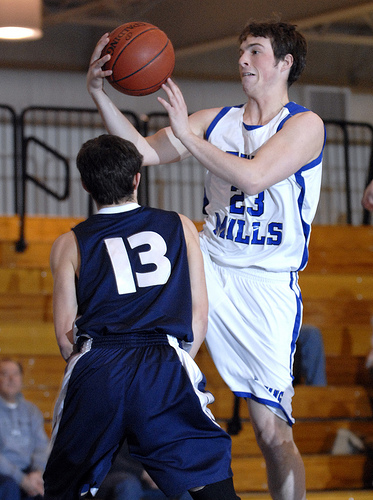

In [ ]:
load_img(f'/content/drive/MyDrive/Flicker8k_Dataset/{l[997][:-1]}')
answer=generate_captions(l[997][:-1],10)

In [ ]:
answer

'a basketball player in a blue uniform is trying to '

In [ ]:
correct_answers=[' '.join(i.split()[1:-1]) for i in word_dict[l[997][:-1]]]

In [ ]:
correct_answers

['a basketball player performing a lay-up .',
 'a boy in a blue basketball uniform , number 13 and a boy in a white basketball uniform , number 23 jump for the ball .',
 'a man in a white uniform jumps while holding a basketball as another in blue blocks him .',
 'basketball player wearing a white , number 23 jersey jumps up with the ball while guarded by number 13 on the opposite team .',
 'the man in white is playing basketball against the man in blue .']

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
# Checking the BLEU Score 
print('BLEU 1','-',sentence_bleu(correct_answers,answer,(1,0,0,0)))
print('BLEU 2','-',sentence_bleu(correct_answers,answer,(0.5,0.5,0,0)))
print('BLEU 3','-',sentence_bleu(correct_answers,answer,(0.33,0.33,0.33,0)))
print('BLEU 4','-',sentence_bleu(correct_answers,answer,(0.25,0.25,0.25,0.25)))

BLEU 1 - 0.8844343264013315
BLEU 2 - 0.844027631186641
BLEU 3 - 0.8026055178613655
BLEU 4 - 0.776233277507624


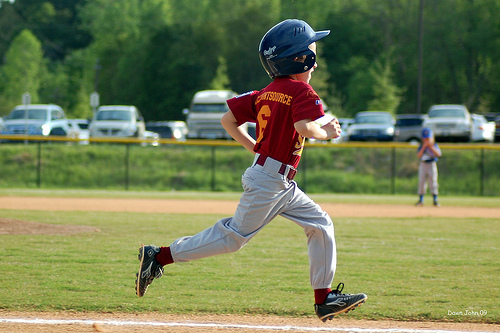

In [ ]:
load_img(f'/content/drive/MyDrive/Flicker8k_Dataset/{l[716][:-1]}')
answer=generate_captions(l[716][:-1],15)

In [ ]:
answer

'a man in a red shirt is running in the grass . '

In [ ]:
correct_answers=[' '.join(i.split()[1:-1]) for i in word_dict[l[716][:-1]]]

In [ ]:
correct_answers

['a boy in a baseball uniform runs the bases .',
 'a boy is running around the bases in a baseball game .',
 'a boy runs to a baseball base .',
 'a child in a baseball uniform runs on a baseball field .',
 'the young baseball player is running to one of the bases .']

In [ ]:
print('BLEU 1','-',sentence_bleu(correct_answers,answer,(1,0,0,0)))
print('BLEU 2','-',sentence_bleu(correct_answers,answer,(0.5,0.5,0,0)))
print('BLEU 3','-',sentence_bleu(correct_answers,answer,(0.33,0.33,0.33,0)))
print('BLEU 4','-',sentence_bleu(correct_answers,answer,(0.25,0.25,0.25,0.25)))

BLEU 1 - 0.8936170212765957
BLEU 2 - 0.7375234203465454
BLEU 3 - 0.6045216175449546
BLEU 4 - 0.5129461159413937
